In [129]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [131]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [132]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [133]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [134]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [135]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [136]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [137]:
# Inspector to print column name and types from db Hawaii_measurement
columns = inspector.get_columns('measurement')
for c in columns:
        print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [138]:
# Inspector to print column name and types from db Hawaii_station
columns = inspector.get_columns('station')
for c in columns:
        print(c['name'],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [139]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [140]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [141]:
# Reflect measurements db into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement

In [142]:
# Reflect station db into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

![precipitation](Images/precipitation.png)

In [143]:
# total records in measurements table
session.query(func.count(measurement.date)).all()

[(19550)]

In [144]:
# 1b Find most recent date
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [145]:
last_date = datetime.strptime('2017-8-23','%Y-%m-%d')
print(last_date)

2017-08-23 00:00:00


In [146]:
# 1a Calculate the date 1 year ago from the last data point in the database
one_yrprior_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date 1yr ago: ",one_yrprior_date)

Date 1yr ago:  2016-08-23


In [147]:
# 1b Perform a query to retrieve the date and precipitation scores
# 1c Save results to Pandas dataframe

oneyr_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_yrprior_date).\
    order_by(measurement.date).all() 
prcp_date_df = pd.DataFrame(oneyr_prcp)
prcp_date_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [148]:
# 1d set date column as the index
prcp_date_df.set_index('date', inplace=True)
prcp_date_df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [149]:
# 1e Sort ascending on index date
prcp_date_df.sort_index(axis=0, level=None, ascending=True, inplace=True)
# prcp_date_df.to_csv(r'File Name.csv')

C:\Users\pk949\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


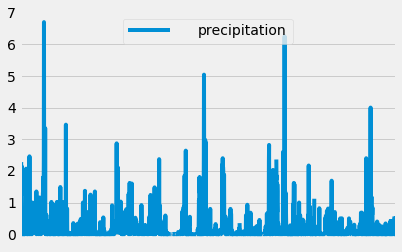

In [150]:
plt.grid
prcp_date_df.plot(legend = False)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
#x_axis.set_label_text('Date')
# x_label = x_axis.get_label()
#x_label.set_visible(True)
plt.xlabel('xlabel', fontsize=18)
plt.legend(('precipitation',), loc= 'upper center', handlelength=3, handletextpad =2)


In [151]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date_df2 = pd.DataFrame(prcp_date_df.describe())
prcp_date_df2

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [152]:
# Design a query to show how many stations are available in this dataset?
ct = session.query(func.count(distinct(measurement.station))).all()
print("Number of stations:", ct)

Number of stations: [(9,)]


In [153]:
# what are the distinct stations are available in this dataset?
for stations in session.query(measurement.station).distinct():
    print("Unique station:", stations)


Unique station: ('USC00519397',)
Unique station: ('USC00513117',)
Unique station: ('USC00514830',)
Unique station: ('USC00517948',)
Unique station: ('USC00518838',)
Unique station: ('USC00519523',)
Unique station: ('USC00519281',)
Unique station: ('USC00511918',)
Unique station: ('USC00516128',)


In [154]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(func.count(measurement.station).label("sta_ct"),measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [155]:
oneyr_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all() 
prcp_date_df = pd.DataFrame(oneyr_prcp)
prcp_date_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [156]:
session.query(measurement.date, measurement.station).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.station).all() 

[('2016-08-23', 'USC00513117'),
 ('2016-08-24', 'USC00513117'),
 ('2016-08-25', 'USC00513117'),
 ('2016-08-26', 'USC00513117'),
 ('2016-08-27', 'USC00513117'),
 ('2016-08-28', 'USC00513117'),
 ('2016-08-29', 'USC00513117'),
 ('2016-08-30', 'USC00513117'),
 ('2016-08-31', 'USC00513117'),
 ('2016-09-01', 'USC00513117'),
 ('2016-09-02', 'USC00513117'),
 ('2016-09-03', 'USC00513117'),
 ('2016-09-04', 'USC00513117'),
 ('2016-09-05', 'USC00513117'),
 ('2016-09-06', 'USC00513117'),
 ('2016-09-07', 'USC00513117'),
 ('2016-09-08', 'USC00513117'),
 ('2016-09-09', 'USC00513117'),
 ('2016-09-10', 'USC00513117'),
 ('2016-09-11', 'USC00513117'),
 ('2016-09-12', 'USC00513117'),
 ('2016-09-13', 'USC00513117'),
 ('2016-09-14', 'USC00513117'),
 ('2016-09-15', 'USC00513117'),
 ('2016-09-16', 'USC00513117'),
 ('2016-09-17', 'USC00513117'),
 ('2016-09-18', 'USC00513117'),
 ('2016-09-19', 'USC00513117'),
 ('2016-09-20', 'USC00513117'),
 ('2016-09-21', 'USC00513117'),
 ('2016-09-22', 'USC00513117'),
 ('2016-

In [157]:
# Which station had the highest number of observations?
q =session.query(func.count(measurement.station).label("sta_ct"),measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
hg_stat = ((q)[0][1])
print("Station with the highest number of observations:", hg_stat)


Station with the highest number of observations: USC00519281


In [158]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp2 =session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == hg_stat).\
    order_by(measurement.date).all() 

In [159]:
tp = [temp[0] for temp in temp2[::-1]]

In [160]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [161]:
#join measurement and station queries
join_tbl = session.query(measurement, station).filter(measurement.id == station.id).all()
for record in join_tbl:
    (measurement, station) = record
    
#     print(measurement.station)
#     print(station.name)

Text(0, 0.5, 'Frequency')

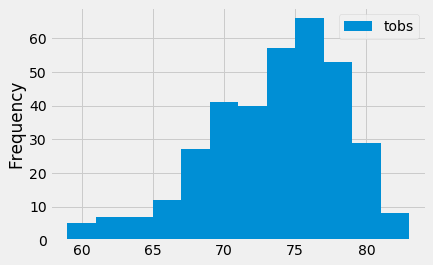

In [167]:
#ticks = np.arange(len(temps))
plt.hist(tp, bins = 12, label="tobs")
plt.legend()
plt.ylabel("Frequency")

![precipitation](Images/station-histogram.png)

In [168]:
#HW EXAMPLE This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
#last_date  #one_yrprior_date
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [169]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(one_yrprior_date, last_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= one_yrprior_date).filter(Measurement.date <= last_date).all()      
print(calc_temps(one_yrprior_date,last_date))

[(58.0, 74.59058295964125, 87.0)]


In [170]:
# prior query, unwrap and label the values
min = ((calc_temps(one_yrprior_date,last_date))[0][0])
avg = ((calc_temps(one_yrprior_date,last_date))[0][1])
max = ((calc_temps(one_yrprior_date,last_date))[0][2])                                                
print("Min: ", min)
print("Avg: ", avg)
print("Max: ", max)

Min:  58.0
Avg:  74.59058295964125
Max:  87.0


In [43]:
print(one_yrprior_date)

2016-08-23


In [173]:
def calc_temps(one_yrprior_date, last_date):
    return session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= one_yrprior_date).filter(Measurement.date <= last_date).all()

C:\Users\pk949\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Temp (F)')

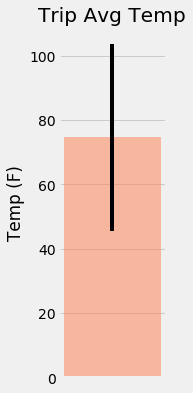

In [253]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Load the query into a dataframe, set the index to the date, and plot the ptps

plt.figure(figsize = (1.7,6))
error = [(max) - (min) ]
plt.bar(0, avg, yerr = error, align= 'center', color = "coral", alpha =0.5)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

## Optional Challenge Assignment

In [523]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [522]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates of:
#     2016-08-23 to 2017-08-23
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [524]:
# Calculate the daily normals for the dates from 2016-08-23 to 2017-08-23

# push each tuple of calculations into a list called `normals`

def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

daily_normals("01-01")

###prcp_date_df = pd.DataFrame(oneyr_prcp)
###prcp_date_df.head(5)

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [525]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [526]:
# Plot the daily normals as an area plot with `stacked=False`
